## Setup

In [1]:
import os, sys, re, json, time, unittest, datetime, shutil
import itertools, collections
import random
from importlib import reload
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef

**Note:** The data below is only on the 10k datasets for now. This will be updated to leverage the full datasets. 

# Baseline Test - Loading Data

In [2]:
users_df = pd.read_json("../dataset/user_10k.json", lines=True)


In [3]:
users_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"[cvVMmlU1ouS3I5fhutaryQ, nj6UZ8tdGo8YJ9lUMTVWN...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
1,3.70,0,0,0,0,0,0,0,0,0,...,0,[],0,"[0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gp...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24
2,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02
3,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Mark,6,0,mBneaEEH5EMyxaVyqS-72A,2015-03-13
4,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Evelyn,3,0,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08


In [4]:
# All types of reviews - 10K dataset
# reviews_df = pd.read_json("../dataset/review_10k.json", lines=True)

# Just restaurant reviews - 10K dataset
reviews_df = pd.read_json("../dataset/restaurant_reviews_10k.json", lines=True)

# All types of reviews
# reviews_df = pd.read_json("../../../final_project/full_dataset/review.json", lines=True)

In [5]:
reviews_df.head()

,business_id,cool,date,funny,stars,text,useful,user_id
0,--6MefnULPED_I942VcFNA,0,2017-08-17,0,4,This is one of my top 3 places to get BBQ pork...,2,FEg8v92qx3kK4Hu4TF28Fg
1,--6MefnULPED_I942VcFNA,0,2017-05-31,0,3,This restaurant is famous for their BBQ dishes...,0,HPtjvIrhzAUkKsiVkeT4MA
2,--6MefnULPED_I942VcFNA,0,2016-10-23,0,2,Roasted pork is one of my favorite things... A...,1,MpvqV7lQcl15rflTBEUhXA
3,--6MefnULPED_I942VcFNA,0,2017-07-30,0,2,I walked by the restaurant more than 5 years a...,1,x-Gbs8sVid3yhJIoHD6Gfw
4,--6MefnULPED_I942VcFNA,0,2017-02-07,1,2,I came here to order a roast duck over rice to...,0,7Dykd1HolQx8mKPYhYDYSg


In [6]:
reviews_df.shape

(10000, 8)

In [7]:
reviews_df.describe()

,cool,funny,stars,useful
count,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.535000,0.458000,3.76540,1.037900
std,1.866849,1.656958,1.31937,2.324307
min,0.000000,0.000000,1.00000,0.000000
25%,0.000000,0.000000,3.00000,0.000000
50%,0.000000,0.000000,4.00000,0.000000
75%,0.000000,0.000000,5.00000,1.000000
max,68.000000,52.000000,5.00000,72.000000


In [8]:
business_df = pd.read_json("../dataset/business_10k.json", lines=True)

In [9]:
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


In [10]:
checkin_df = pd.read_json("../dataset/checkin_10k.json", lines=True)

In [11]:
checkin_df.head()

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'21:00': 4, '1:00': 1, '4:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Monday': {'13:00': 1}, 'Thursday': {'20:00':..."
2,tJRDll5yqpZwehenzE2cSg,"{'Monday': {'12:00': 1, '1:00': 1}, 'Friday': ..."
3,r1p7RAMzCV_6NPF0dNoR3g,"{'Thursday': {'23:00': 1}, 'Saturday': {'21:00..."
4,mDdqgfrvROGAumcQdZ3HIg,"{'Monday': {'12:00': 1, '21:00': 1}, 'Wednesda..."


In [12]:
photos_df = pd.read_json("../dataset/photos_10k.json", lines=True)

In [13]:
photos_df.head()

,business_id,caption,label,photo_id
0,OnAzbTDn79W6CFZIriqLrA,,inside,soK1szeyan202jnsGhUDmA
1,OnAzbTDn79W6CFZIriqLrA,,inside,dU7AyRB_fHOZkflodEyN5A
2,OnAzbTDn79W6CFZIriqLrA,,outside,6T1qlbBdKkXA1cDNqMjg2g
3,OnAzbTDn79W6CFZIriqLrA,Bakery area,inside,lHhMNhCA7rAZmi-MMfF3ZA
4,XaeCGHZzsMwvFcHYq3q9sA,,food,oHSCeyoK9oLIGaCZq-wRJw


In [14]:
tip_df = pd.read_json("../dataset/tip_10k.json", lines=True)

In [15]:
tip_df.head()

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ
4,ESzO3Av0b1_TzKOiqzbQYQ,2017-01-28,0,"Parking is a premium, keep circling, you will ...",ulQ8Nyj7jCUR8M83SUMoRQ


# Baseline Model

In [16]:
n_features = 100000

text = reviews_df["text"]

print("Fitting Count Vectorizer")
# vectorizer = CountVectorizer(max_df=0.95, min_df=2,
#                                 max_features=n_features,
#                                 stop_words='english')
# word_vector = vectorizer.fit_transform(text)

# No setting of hyper-parameters
vectorizer = CountVectorizer()
word_vector = vectorizer.fit_transform(text)

print(np.shape(word_vector))

Fitting Count Vectorizer
(10000, 24872)


## NB Training and Scoring

In [18]:
# x_train_user_reviews = reviews_df["text"][0:6000]
# x_dev_user_reviews = reviews_df["text"][6001:8000]
# x_test_user_reviews = reviews_df["text"][8001:10000]

# x_train_user_reviews = word_vector[0:6000]
# x_dev_user_reviews = word_vector[6001:8000]
x_train_user_reviews = word_vector[0:8000]
x_test_user_reviews = word_vector[8001:10000]

# print("x_train_user_reviews", x_train_user_reviews)
# print("shape x_train_user_reviews", np.shape(x_train_user_reviews))

# y_train_user_stars = reviews_df["stars"][0:6000]
# y_dev_user_stars = reviews_df["stars"][6001:8000]
y_train_user_stars = reviews_df["stars"][0:8000]
y_test_user_stars = reviews_df["stars"][8001:10000]

train_file = x_train_user_reviews
label_file = y_train_user_stars
training_data = x_train_user_reviews

In [20]:
nb = MultinomialNB()

nb.fit(x_train_user_reviews, y_train_user_stars)

y_pred = nb.predict(x_test_user_reviews)

acc = accuracy_score(y_pred, y_test_user_stars)
print("Accuracy on test set: {:.02%}".format(acc))
# pred_proba = nb.predict_proba(y_pred)
# log_loss_metric = log_loss(y_test_user_stars, pred_proba)
# print("Log-loss on test set: {:.02%}".format(log_loss_metric))

Accuracy on test set: 55.93%


In [21]:
# Print example prediction

print(y_pred[400])

4


## Create New Slices of Review JSON

In [22]:
# # reviews_path = "../../full_dataset/review.json"
# full_df = pd.read_json("../../full_dataset/review.json", lines=True)
# full_df.shape

In [23]:
# df_100k = full_df[0:100000]
# df_100k.to_json('../../full_dataset/df_100k.json', orient='records', lines=True)
# df_100k.shape

## RNN-LSTM

In [24]:
# !pip install --upgrade pip

# !pip install keras
# !pip install pandas_ml


In [25]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Embedding, Dropout, Dense, LSTM
from keras.callbacks import CSVLogger, History, ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_recall_fscore_support
from pandas_ml import ConfusionMatrix

from scipy import stats

%matplotlib inline

class YelpLSTM(object):
    def __init__(self, parms):
        self._parms = parms
#         self._tokenizer = Tokenizer(nb_words=self._parms['vocabulary_size'])
        self._tokenizer = Tokenizer(num_words=self._parms['vocabulary_size'])

        self._reviews = None
        self._balanced = None
        self._glove = None
        self._embedding_matrix = None
        self._model = None
        self._verbose = True
        self._predicted_classes = None
        self._predicted_proba = None
        self._eval_actual = None
        self._eval_predicted_proba = None
        self._eval_predicted_classes = None
        self._logs = None
        self._tpr = None
        self._fpr = None
        self._thresholds = None
        self._auc = None
        self._target_range = None
        
    def console(self, message):
        if self._verbose:
            print(message)
            
    def update_parms(self, parms):
        if parms['vocabulary_size'] != self._parms['vocabulary_size']:
            self._tokenizer = Tokenizer(nb_words=parms['vocabulary_size'])
        self._parms = parms

    def load_reviews(self, reviews_path):
        self.console('Loading reviews...')
        
        self._reviews = pd.read_json(reviews_path, lines=True)

        self.console('%d reviews loaded.' % len(self._reviews))
        
#     def load_glove(self, glove_folder):
    # Changing to only load single file
    def load_glove(self, gloveFile):
        self.console('Loading GloVe embeddings...')
        glove = {}
        count = 0
#         with open(os.path.join(glove_folder, 'glove.6B.' + str(self._parms['embedding_dim']) + 'd.txt'), 'r') as f:

        with open(gloveFile, 'r') as f:
            while True:
                line = f.readline()
                if not line:
                    break
                line = line.split(' ')
                word = line[0]
                vector = np.asarray(line[1:], dtype='float32')
                glove[word] = vector
        self._glove = glove
        self.console('%d embeddings loaded.' % len(self._glove))
        
    @property
    def training(self):
        return self._X_train, self._y_train
    
    @property
    def test(self):
        return self._X_test, self._y_test
    
    @property
    def best_model(self):
        return self._model
    
    @property
    def predicted_classes(self):
        return self._predicted_classes
    
    @property
    def predicted_proba(self):
        return self._predicted_proba
    
    @property
    def tokenizer(self):
        return self._tokenizer
    
    @property
    def logs(self):
        return self._logs
        
    @property
    def confusion_matrix(self):
        return self._cm
    
    @property
    def prfs(self):
        return self._prfs
    
    @property
    def prfs_weighted(self):
        return self._prfs_weighted
    
    @property
    def corr_coeff(self):
        return self._corr_coeff
    
    @property
    def fpr(self):
        return self._fpr
    
    @property
    def tpr(self):
        return self._tpr
    
    @property
    def thresholds(self):
        return self._thresholds
    
    @property
    def auc(self):
        return self._auc
    
    @property
    def eval_actual(self):
        return self._eval_actual
    
    @property
    def eval_predicted_classes(self):
        return self._eval_predicted_classes
            
    def _balance_dataset(self):
        categories = []
        samples = []
                
        self._target_range = range(2)
        
        if self._parms['target']['feature'] == 'stars':
            prefix = ''
            self._target_range = range(1,6)
            
        else:
            prefix = 'is_'
            self._reviews['is_' + self._parms['target']['feature']] = self._reviews[self._parms['target']['feature']].apply(lambda v: v > self._parms['target']['threshold']).astype(int)            
        for i in self._target_range:
            categories.append(self._reviews[self._reviews[prefix + self._parms['target']['feature']] == i])
        
        sizes = list(map(lambda s: len(s), categories))
        
        nb_samples = min(self._parms['samples'], np.min(sizes))
        self.console('Using %s samples per category' % str(nb_samples))
        
        for category in categories:
            samples.append(category.sample(n=nb_samples, random_state=32))
        self._balanced = pd.concat(samples)
       
    def _build_datasets(self):
        self._tokenizer.fit_on_texts(self._balanced.text.values)
        
        sequences = self._tokenizer.texts_to_sequences(self._balanced.text)
        padded_seq = pad_sequences(sequences, maxlen=self._parms['seq_size'])
        
        if self._parms['target']['feature'] == 'stars':
            target = to_categorical(self._balanced[self._parms['target']['feature']])
        else:
            target = self._balanced['is_' + self._parms['target']['feature']].values

        # Original
#         self._X_train, self._X_test, self._y_train, self._y_test = train_test_split(padded_seq, target, test_size=0.2, random_state=42)
        # Updates to randomization to replicate shared restaurant_reviews_final.JSON
        self._X_train, self._X_test, self._y_train, self._y_test = train_test_split(padded_seq, target, test_size=0.2, random_state=123)
            
    def _build_embeddings(self):
        tokenized_words = map(lambda t: t[0], sorted(self._tokenizer.word_index.items(), key=lambda t: t[1])[:self._parms['vocabulary_size']])

        embedding_matrix = np.zeros((self._parms['vocabulary_size'], self._parms['embedding_dim']))
        for idx, word in enumerate(tokenized_words):
            try:
                embedding_matrix[idx] = self._glove[word]
            except:
                pass
        self._embedding_matrix = embedding_matrix

    def _build_model(self):
        model = Sequential()

        model.add(Embedding(input_dim=self._parms['vocabulary_size'],
                            output_dim=self._parms['embedding_dim'],
                            input_length=self._parms['seq_size'],
                            weights=[self._embedding_matrix],
                            trainable=False))

        model.add(LSTM(self._parms['memory_neurons']))
        model.add(Dropout(0.2))

        activation = 'sigmoid'
        loss = 'binary_crossentropy'        
        
        outputs = 1
        
        if len(self._y_train.shape) > 1:
            activation = 'softmax'
            loss = 'categorical_crossentropy'
            outputs = self._y_train.shape[1]
            
        model.add(Dense(outputs, activation=activation))        
        
        model.compile(loss=loss, optimizer='nadam', metrics=['accuracy'])    
    
        self._model = model
        self.console(self._model.summary())

    def fit(self, model_name, folder='./', verbose=True):
        self._verbose = verbose
        
        assert self._reviews is not None, 'Reviews file was not loaded'
        assert len(self._reviews) > 0, 'Reviews file is empty'
        assert self._glove is not None, 'GloVe file was not loaded'
        assert len(self._glove) > 0, 'GloVe file is empty'
        
        self.console('Balancing dataset...')
        self._balance_dataset()
        self.console('Building training and test datasets...')
        self._build_datasets()
        self.console('Building word embeddings from GloVe...')
        self._build_embeddings()
        self.console('Building model...')
        self._build_model()
        self.console('Fitting model...')
        
        parms_desc = model_name + '_%ddim_%dvoc_%dseq' % (self._parms['embedding_dim'],
                                                          self._parms['vocabulary_size'],
                                                          self._parms['seq_size'])      
        
        hist = History()        
        
        logger = CSVLogger(os.path.join(folder, parms_desc) + '_training_logs.csv')     
        
        checks = ModelCheckpoint(os.path.join(folder, parms_desc) + '_model-{epoch:02d}_{val_acc:.2f}',
                                 monitor='val_acc',
                                 verbose=int(self._verbose),
                                 save_best_only=True,
                                 mode='max')
        early_stopping = EarlyStopping(monitor='val_acc', patience=2)
        
        self._model.fit(self._X_train
                        , self._y_train
#                        , nb_epoch=self._parms['nb_epochs']
                        , epochs=self._parms['epochs']
                        , batch_size=self._parms['batch_size']
                        , validation_data=(self._X_test, self._y_test)
                        , callbacks=[checks, hist, logger, early_stopping]
                        )
        
        self._logs = pd.read_csv(os.path.join(folder, parms_desc) + '_training_logs.csv')
        best_epoch = self._logs['val_acc'].argmax()
    
        best_val_acc = '{:.2f}'.format(self._logs['val_acc'].iloc[best_epoch])
        
        best_model = (os.path.join(folder, parms_desc) + '_model-%02d_%s') % (best_epoch + 1, best_val_acc)
        
        with open(os.path.join(folder, parms_desc + '_tokenizer'), 'wb') as tok:
            pickle.dump(self._tokenizer, tok)
        
        self.console('Calculating predictions for the best model...')
        self._model = load_model(best_model)       
        
        self._predicted_proba = self.predict_proba()
        if len(self._y_train.shape) > 1:
            self._predicted_classes = np.argmax(self._predicted_proba, axis=1)
            
        else:
            self._predicted_classes = (self._predicted_proba > 0.5).astype(int)
        
        self.console('Calculating metrics for the best model...')
        self.evaluate()
        self.console('Finished!')      
        
        # serialize model to JSON
        model_json = self._model.to_json()
        with open("model.json", "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        self._model.save_weights("model.h5")
        print("Saved model to disk")      
        
        return self._model

    def load(self, tokenizer, model):
        error_msg = ''
        try:
            self._model = load_model(model)
        except:
            error_msg = 'Error loading model!'
            
        try:
            with open(tokenizer, 'rb') as tok:
                self._tokenizer = pickle.load(tok)
        except:
            error_msg = 'Error loading tokenizer!'
            
        return (error_msg == ''), error_msg
    
    def make_prediction(self, sentence):
        sequence = self._tokenizer.texts_to_sequences([sentence])
        padded_seq = pad_sequences(sequence, maxlen=self._parms['seq_size'])
        return self.predict_classes(padded_seq)[0]
    
    def predict_classes(self, X=None, threshold=0.5):
        if len(self._y_train.shape) > 1:
            predictions = np.argmax(self.predict_proba(X), axis=1)
        else:
            predictions = (self.predict_proba(X) > threshold).astype(int)
            
        return predictions
        
    def predict_proba(self, X=None):
        if X is None:
            X = self._X_test
        predictions = self._model.predict_proba(X)
        return predictions
    
    def evaluate(self, actual=None, predicted_proba=None, threshold=0.5):
        if actual is None:
            eval_actual = self._y_test[:]
        else:
            eval_actual = actual[:]
            
        if predicted_proba is None:
            eval_predicted_proba = self._predicted_proba[:]
        else:
            eval_predicted_proba = predicted_proba[:]
            
        if len(eval_actual.shape) == 1:
            binary = True
            eval_predicted_classes = (eval_predicted_proba > threshold).astype(int).ravel()
            eval_predicted_proba = eval_predicted_proba.ravel()
        else:
            binary = False
            eval_predicted_classes = eval_predicted_proba.argmax(axis=1)
            eval_actual = eval_actual.argmax(axis=1)
        
        self._eval_actual = eval_actual
        self._eval_predicted_proba = eval_predicted_proba
        self._eval_predicted_classes = eval_predicted_classes
    
        self._cm = ConfusionMatrix(self._eval_actual, self._eval_predicted_classes)
        
        prfs = precision_recall_fscore_support(y_true=self._eval_actual, y_pred=self._eval_predicted_classes)
        prfs = pd.DataFrame.from_dict(dict(zip(['precision', 'recall', 'fscore', 'support'], prfs)))
        prfs_weighted = precision_recall_fscore_support(y_true=self._eval_actual, y_pred=self._eval_predicted_classes, average = 'weighted')
#         prfs_weighted = pd.DataFrame.from_dict(dict(zip(['precision', 'recall', 'fscore', 'support'], prfs_weighted)))
        corr_coeff = matthews_corrcoef(y_true=self._eval_actual, y_pred=self._eval_predicted_classes)                
        
#         prfs.set_index([self._target_range], inplace=True)
        
        self._prfs = prfs
        self._prfs_weighted = prfs_weighted
        self._corr_coeff = corr_coeff
        
        if binary:
            self._fpr, self._tpr, self._thresholds = roc_curve(self._eval_actual, self._eval_predicted_proba)
            self._auc = auc(self._fpr, self._tpr)
        else:
            self._fpr, self._tpr, self._thresholds, self._auc = None, None, None, None

Using TensorFlow backend.


In [26]:
parms = {
#          'embedding_dim': 100,
         'embedding_dim': 300,
        
         'vocabulary_size': 10000,
#          'vocabulary_size': 100000,
         'seq_size': 400,

         'epochs': 30,         
#          'epochs': 2,
#          'epochs': 1,
         
         'batch_size': 128,
         'memory_neurons': 100,
         'target': {
             'feature': 'stars'
             , 'threshold': None
             },
#          'samples': 62500
         'samples': 1000000
         }

lstm = YelpLSTM(parms)

In [27]:
start_time = datetime.datetime.now()
print("Start time: ", start_time)

# reviews_path = "../dataset/review_10k.json"

# reviews_path = "../dataset/restaurant_reviews_10k.json"

# reviews_path = "../../full_dataset/review.json"

# reviews_path = "../../full_dataset/df_100k.json"

# reviews_path = "../../full_dataset/restaurant_reviews.json"

reviews_path = "../../full_dataset/restaurant_reviews_final.json"

lstm.load_reviews(reviews_path)

end_time = datetime.datetime.now()
print("End time: ", end_time)

time_taken = end_time - start_time
print("Time taken: ", time_taken)

Start time:  2018-08-09 01:10:21.976300
Loading reviews...
1873619 reviews loaded.
End time:  2018-08-09 01:11:09.529467
Time taken:  0:00:47.553167


### Load GloVe

In [28]:
# Small GloVe file
# gloveFile = "../../glove/glove.6B.100d.txt"

# Primary GloVe file
gloveFile = "../../glove/glove.6B.300d.txt"

# Large GloVe file
# gloveFile = "../../glove/glove.42B.300d.txt"

start_time = datetime.datetime.now()
print("Start time: ", start_time)

lstm.load_glove(gloveFile)

end_time = datetime.datetime.now()
print("End time: ", end_time)

time_taken = end_time - start_time
print("Time taken: ", time_taken)

Start time:  2018-08-09 01:11:09.540475
Loading GloVe embeddings...
400000 embeddings loaded.
End time:  2018-08-09 01:11:44.404142
Time taken:  0:00:34.863667


In [29]:
start_time = datetime.datetime.now()
print("Start time: ", start_time)

model = lstm.fit(model_name='stars_100neurons', folder='./models/stars')
# model = lstm.fit(model_name='stars_100neurons', folder='./')

end_time = datetime.datetime.now()
print("End time: ", end_time)

time_taken = end_time - start_time
print("Time taken: ", time_taken)

Start time:  2018-08-09 01:11:44.415212
Balancing dataset...
Using 146429 samples per category
Building training and test datasets...
Building word embeddings from GloVe...
Building model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 300)          3000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 3,161,006
Trainable params: 161,006
Non-trainable params: 3,000,000
_________________________________________________________________
None
Fitting model...
Train on 585716 samples, validate on 146429 s

/home/alexanderherring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:273: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


Calculating predictions for the best model...
Calculating metrics for the best model...
Finished!
Saved model to disk
End time:  2018-08-09 10:22:00.579414
Time taken:  9:10:16.164202


## Analysis

In [31]:
# lstm._eval_actual

In [32]:
# lstm.eval_predicted_classes

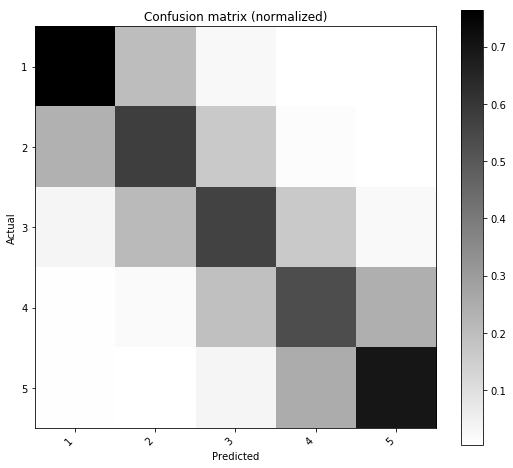

In [33]:
lstm.confusion_matrix.plot(normalized=True)

In [34]:
lstm.prfs

,fscore,precision,recall,support
0,0.742946,0.723048,0.763970,29242
1,0.574187,0.570534,0.577887,29331
2,0.566782,0.570872,0.562751,29171
3,0.541359,0.549937,0.533045,29399
4,0.704392,0.713206,0.695793,29286


In [35]:
lstm.prfs_weighted

(0.62545767146970765, 0.62661084894385677, 0.62586333597539789, None)

In [36]:
lstm.corr_coeff

0.53333385058156124

### Example Predictions

In [ ]:
current_example = 916765
rand_tag_num = current_example
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
current_example = 865234
rand_tag_num = current_example
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
current_example = 757343
rand_tag_num = current_example
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
current_example = 392282
rand_tag_num = current_example
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
print(reviews_df["text"][511248])
print("Actual stars: ", reviews_df["stars"][511248])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][511248]))

In [ ]:
print(reviews_df["text"][811248])
print("Actual stars: ", reviews_df["stars"][811248])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][811248]))

In [ ]:
print(reviews_df["text"][911249])
print("Actual stars: ", reviews_df["stars"][911249])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][911249]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))

In [ ]:
rand_tag_num = random.randint(1,1000000)
print(rand_tag_num)

print(reviews_df["text"][rand_tag_num])
print("Actual stars: ", reviews_df["stars"][rand_tag_num])
print("Predicted stars: ", lstm.make_prediction(reviews_df["text"][rand_tag_num]))